In [23]:
import pandas as pd
data = pd.read_excel("data3/danawa_crawling_result.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     410 non-null    object
 1   스펙 목록   410 non-null    object
 2   가격      440 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.4+ KB


In [24]:
data.head()

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1203710
1,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",50080
2,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",36230
3,mp0mgdh43Z,mp0mgdh43Z339160,339160
4,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,462570


In [25]:
data['상품명'][:10]

0     LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
1    샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
2          샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)
3                            mp0mgdh43Z
4                   LG전자 코드제로 A9 A9100S
5                           샤오미 드리미 V10
6                                   NaN
7                 삼성전자 제트 VS20T9278S3CS
8             LG전자 코드제로 ThinQ A9S A9700
9      샤오미 LYDSTO 핸디형 에어펌프 진공청소기 (해외구매)
Name: 상품명, dtype: object

In [26]:
title = '사오미 드리미 V10'
info = title.split(" ",1)
info

['사오미', '드리미 V10']

In [27]:
company_list = []#회사명저장
product_list = []#상품명저장
price_list = [] #가격 저장
for index, title in enumerate(data['상품명']): #인젝스와 , value로 나누어 가져온다
    try:
        title_info = title.split(' ',1)
#         print(title_info)
        company_name = title_info[0]
        product_name = title_info[1]
        company_list.append(company_name)
        product_list.append(product_name)
        price_list.append(data['가격'][index])
        
    except:
        continue
    
print(len(data))
print(len(company_list))
print(len(product_list))
print(len(price_list))

440
400
400
400


In [29]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸이클론 / 스마트인버터모터 / 흡입력: 210W / 소비전력: 590W / [배터리] 분리형 / 리튬이온 (2개) / 전압: 25.2V / 충전시간: 4시간 / 사용시간: 1시간(개당) / [필터] 헤파필터 / 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / WiFi / [구성품] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 알레르기인증(BAF) / 미세먼지인증(SLG) / 색상: 카밍베이지 / 무게: 2.6kg / 먼지통자동비움 / 크기(가로x세로x깊이): 250x1120x260mm'

In [30]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입+걸레겸용',
 '[성능] 2중터보싸이클론',
 '스마트인버터모터',
 '흡입력: 210W',
 '소비전력: 590W',
 '[배터리] 분리형',
 '리튬이온 (2개)',
 '전압: 25.2V',
 '충전시간: 4시간',
 '사용시간: 1시간(개당)',
 '[필터] 헤파필터',
 '5단계여과',
 '[기능] 자동물공급',
 '디스플레이표시창',
 '배터리잔량표시',
 'WiFi',
 '[구성품] 바닥',
 '물걸레',
 '침구',
 '솔형',
 '틈새',
 '올인원타워',
 '[부가] 알레르기인증(BAF)',
 '미세먼지인증(SLG)',
 '색상: 카밍베이지',
 '무게: 2.6kg',
 '먼지통자동비움',
 '크기(가로x세로x깊이): 250x1120x260mm']

In [31]:
category = spec_list[0]
category

'핸디/스틱청소기'

In [32]:
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
        
print(use_time_spec)
print(suction_spec)

사용시간: 1시간(개당)
흡입력: 210W


In [33]:
use_time_value = use_time_spec.split(" ")[1].strip()
suction_value = suction_spec.split(' ')[1].strip()
print(use_time_value)
print(suction_value)

1시간(개당)
210W


In [34]:
data['스펙 목록']

0      핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...
1      차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...
2      차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...
3                                       mp0mgdh43Z339160
4      핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...
                             ...                        
435    진공청소기 / 무선형 / 전압: 32.85V / [성능] 헤파필터 / 먼지통 / 먼...
436    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / [성능] 흡입력: 12000Pa / ...
437    핸디/스틱청소기 / 핸디형 / 무선형 / [배터리] 리튬이온 / 전압: 7.4V /...
438    차량용청소기 / 무선 / 흡입력: 5,800Pa / 최대출력: 80W / 헤파필터 ...
439    차량용청소기 / 무선 / 흡입력: 8,000Pa / 헤파필터 / 추가노즐: 틈새, ...
Name: 스펙 목록, Length: 440, dtype: object

In [35]:
#카테고리, 사용시간, 흡입력 추출 
category_list = []
use_time_list = []
suction_list = []
for spec_data in data['스펙 목록']:
    try:
        
        # ' / ' 기준으로 스펙 분리하기 
        spec_list = spec_data.split(' / ')
        if len(spec_list) > 1:
            # 카테고리 추출하기
            category = spec_list[0]
            category_list.append(category)
            # 사용시간, 흡입력 추출 
            # 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성 
            use_time_value = None
            suction_value = None
            # spec_list의 각 원소에서 사용시간, 흡입력 수치 추출
            for spec in spec_list:
                if '사용시간' in spec:
                    use_time_value = spec.split(' ')[1].strip()
                if '흡입력' in spec:
                    suction_value = spec.split(' ')[1].strip()


            use_time_list.append(use_time_value)
            suction_list.append(suction_value)
    except:
        continue

In [36]:
print('카테고리:',len(category_list),category_list[0:5])
print('사용시간:',len(use_time_list), use_time_list[0:5])
print('흡입력:',len(suction_list),suction_list[0:5])

카테고리: 400 ['핸디/스틱청소기', '차량용청소기', '차량용청소기', '핸디/스틱청소기', '핸디/스틱청소기']
사용시간: 400 ['1시간(개당)', '25분', '9~30분', '40분(개당)', '1시간(개당)']
흡입력: 400 ['210W', '16,800Pa', '13,000Pa', None, '22000Pa']


In [37]:
def convert_time_minute(time):
    try:
        #시간에 ~ 있을때
        if '~' in time:
            hour_m = time.split('~')[0] #1시간30분
            if '시간' in hour_m:
                hour = hour_m.split('시간')[0] #1
                if '분' in hour_m:
                    minute = hour_m.split('시간')[-1].split('분')[0]
                    if '~' in minute:
                        minute = minute.split('~')[1]
                else:
                    minute = 0
            else:
                hour = 0
                minute = hour_m.split('분')[0]
                if '~' in minute:
                    minute = minute.split('~')[1]

        
        #시간에 ~ 없을때
        else:
            if '시간' in time:
                hour = time.split('시간')[0]
                if '분' in time:
                    minute = time.split('시간')[-1].split('분')[0]
                    if '~' in minute:
                        minute = minute.split('~')[1]
                else:
                    minute = 0

            else:
                hour = 0
                minute = time.split('분')[0]
                if '~' in minute:
                    minute = minute.split('~')[1]

        return int(hour) * 60 + int(minute)
    except Exception as e:
        print(e)

In [38]:
times = ['40분(개당)', '4분', '1시간30분(개당)', '9~10분', None, '1시간20분~30분(개당)', '1시간30분~2시간(개당)']
for time in times:
    time_value = convert_time_minute(time)
    print(time,"=",time_value)

40분(개당) = 40
4분 = 4
1시간30분(개당) = 90
9~10분 = 9
argument of type 'NoneType' is not iterable
None = None
1시간20분~30분(개당) = 80
1시간30분~2시간(개당) = 90


In [39]:
new_use_time_list = []
for time in use_time_list:
    time_value = convert_time_minute(time)
    new_use_time_list.append(time_value)
    
print(len(new_use_time_list))
print(new_use_time_list[:20])

argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
invalid literal for int() with base 10: '사용'
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is not iterable
argument of type 'NoneType' is 

In [40]:
suction_list[:10]

['210W',
 '16,800Pa',
 '13,000Pa',
 None,
 '22000Pa',
 '200W',
 '200W',
 '10,000Pa',
 '200W',
 '210W']

In [41]:
def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            result = value.replace('W',"").replace("A","")
            result = int(result.replace(",",""))
        elif 'PA' in value:
            result = value.replace('PA',"")
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except Exception  as er:
        print(er)
        return None

In [42]:
suction = ['100w', '10aw', '12,000pa']
for power in suction:
    value = get_suction(power)
    print(power,"=", value)

100w = 100
10aw = 10
12,000pa = 120.0


In [43]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
    
print(len(new_suction_list))
print(new_suction_list[:20])

'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' object has no attribute 'upper'
'NoneType' 

In [44]:
print(len(company_list))
print(len(category_list))
print(len(product_list))
print(len(price_list)) #가격을 다른 데이터와 같은 인덱스의 값으로 가져온다.
print(len(new_use_time_list))
print(len(new_suction_list))

400
400
400
400
400
400


In [45]:

pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명']=company_list
pd_data["제품"]=product_list
pd_data['가격']= price_list
pd_data['사용시간']=new_use_time_list
pd_data['흡입력']=new_suction_list
pd_data.iloc[14:21,]

,카테고리,회사명,제품,가격,사용시간,흡입력
14,핸디/스틱청소기,무궁화전자,바로바로 MC-B250,36870,20.0,NaN
15,차량용청소기,샤오미,SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),42370,30.0,120.0
16,차량용청소기,카렉스,파워스톰 미니 무선청소기,75490,17.0,120.0
17,핸디/스틱청소기,샤오미,TROUVER POWER 11,136730,60.0,NaN
18,차량용청소기,리하스,차량용 미니 무선 청소기 TEB-4120,99000,15.0,150.0
19,핸디/스틱청소기,일렉트로룩스,ZB3302AK,128780,42.0,NaN
20,욕실청소기,한샘,트리플 플러스 HSBC-6000W,50310,100.0,NaN


In [46]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기          295
차량용청소기             41
물걸레청소기             36
침구청소기              11
욕실청소기               9
업소용청소기              3
로봇청소기               3
진공청소기               1
핸디/스틱청소기+로봇청소기      1
Name: 카테고리, dtype: int64

In [47]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

295

In [48]:
pd_data_final['카테고리'].value_counts()

핸디/스틱청소기    295
Name: 카테고리, dtype: int64

In [49]:
pd_data_final.to_excel('data3/danawa_data_final.xlsx', index=False)

## 무선청소기 모델별 비교분석

In [50]:
# 데이터 살펴보기
danawa_data = pd.read_excel('data3/danawa_data_final.xlsx')
danawa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    295 non-null    object 
 1   회사명     295 non-null    object 
 2   제품      295 non-null    object 
 3   가격      295 non-null    int64  
 4   사용시간    281 non-null    float64
 5   흡입력     177 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.0+ KB


In [51]:
danawa_data.tail()

,카테고리,회사명,제품,가격,사용시간,흡입력
290,핸디/스틱청소기,유니맥스,UVC-1686A,31390,NaN,NaN
291,핸디/스틱청소기,캐치웰,THC-1000,39900,28.0,80.0
292,핸디/스틱청소기,홈마블,H80BL,79000,45.0,115.0
293,핸디/스틱청소기,비브르,스톰파워 VE12,119000,40.0,NaN
294,핸디/스틱청소기,대웅모닝컴,DWM-HV74N,34300,15.0,NaN


In [52]:
top_list = danawa_data.sort_values(['흡입력'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
247,핸디/스틱청소기,퍼피유,T12R,309590,60.0,290.0
231,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290.0
120,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,249000,48.0,290.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0


In [53]:
top_list = danawa_data.sort_values(['사용시간'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
119,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250.0
165,핸디/스틱청소기,로보락,H6,439000,90.0,250.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
257,핸디/스틱청소기,도노,SY-306,179000,80.0,220.0


In [54]:
top_list = danawa_data.sort_values(['사용시간','흡입력'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
127,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
119,핸디/스틱청소기,샤오미,드리미 V11,242730,90.0,250.0
165,핸디/스틱청소기,로보락,H6,439000,90.0,250.0
257,핸디/스틱청소기,도노,SY-306,179000,80.0,220.0


In [55]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값:",price_mean_value)
print("흡입력 평균값:",suction_mean_value)
print("사용시간 평균값:",use_time_mean_value)

가격 평균값: 381915.0779661017
흡입력 평균값: 175.28813559322035
사용시간 평균값: 42.754448398576514


In [56]:
#가성비 좋은 제품 탐색
condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)]

condition_data.head(10)

,카테고리,회사명,제품,가격,사용시간,흡입력
2,핸디/스틱청소기,샤오미,드리미 V10,156320,60.0,220.0
8,핸디/스틱청소기,샤오미,드리미 V9,108760,60.0,200.0
17,핸디/스틱청소기,샤오미,드리미 V12,309430,90.0,270.0
30,핸디/스틱청소기,샤오미,로이드미 Z1,268000,60.0,220.0
39,핸디/스틱청소기,샤오미,드리미 V10 ARES,205760,60.0,220.0
50,핸디/스틱청소기,샤오미,SHUNZAO Z11,145100,60.0,260.0
59,핸디/스틱청소기,샤오미,드리미 V10P,224900,60.0,220.0
60,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,232990,60.0,260.0
82,핸디/스틱청소기,샤오미,로이드미 제로,216380,60.0,220.0
90,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220.0


In [57]:
#데이터 시각화
#결측값제거

chart_data = danawa_data.dropna(axis=0)
len(chart_data)


173

In [58]:
# 흡입력, 사용시간 최대, 최소
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

In [59]:
#라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    

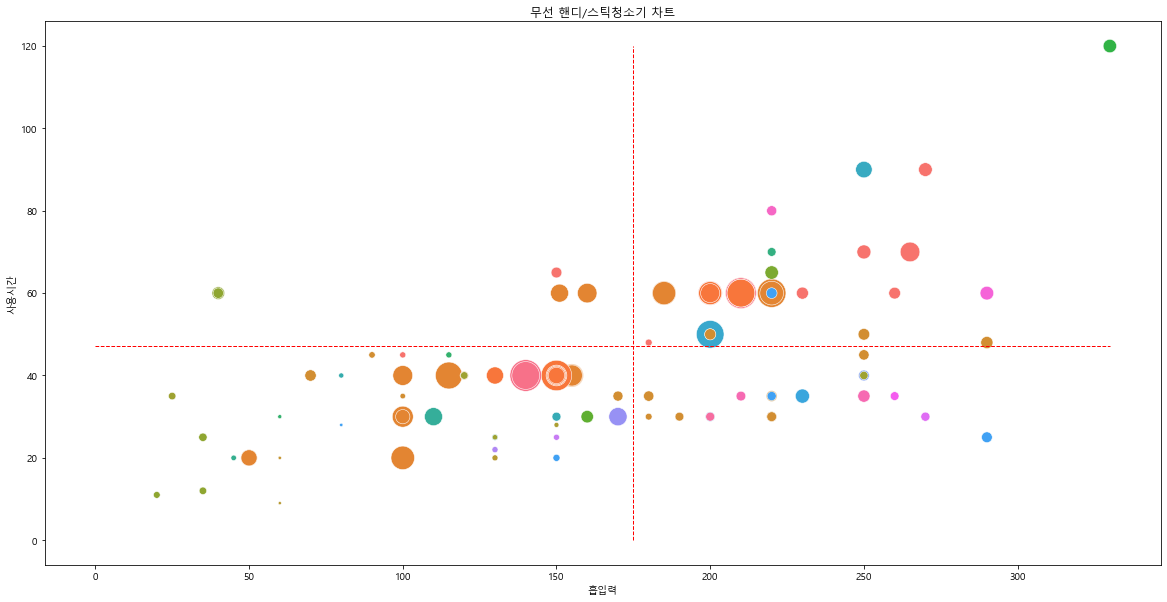

In [60]:
#청소기 성능 시각화
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue=chart_data['회사명'],data = chart_data, sizes=(10,1000),legend=False)
plt.plot([0, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 ) #사용시간평균선
plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 ) #흡입력 평균선
plt.show()

In [61]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

In [62]:
# 흡입력, 사용시간의 최댓값, 최솟값 구하기
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()
print("흡입력 max",suction_max_value)
print("흡입력 mean",suction_mean_value)
print("사용시간 max",use_time_max_value)
print("사용시간 mean",use_time_mean_value)

흡입력 max 270.0
흡입력 mean 194.8
사용시간 max 90.0
사용시간 mean 59.5


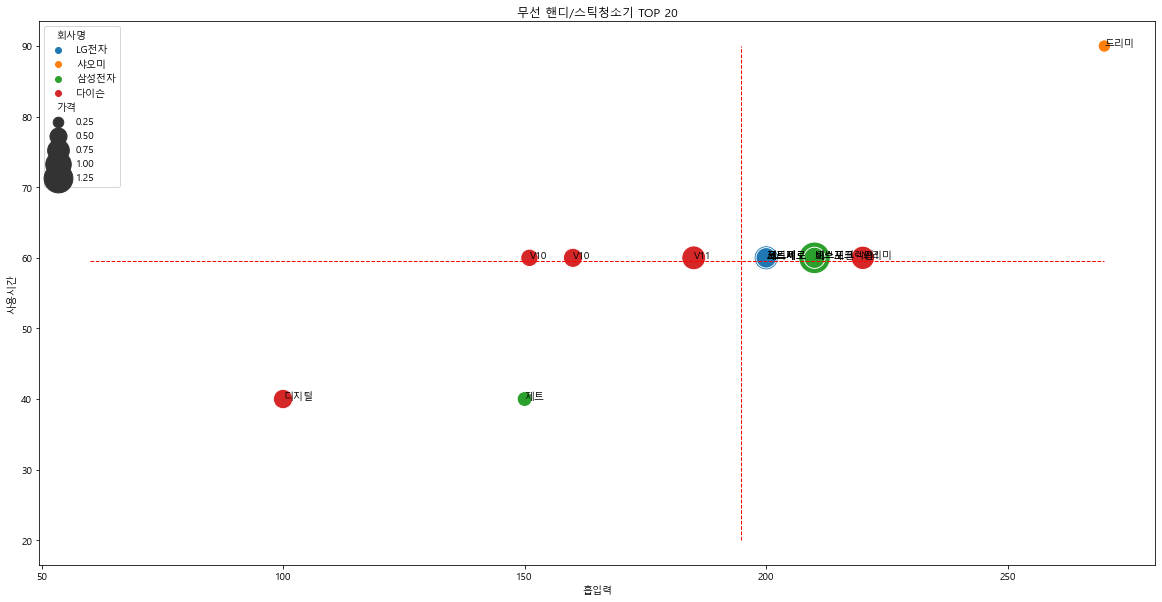

In [63]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (10, 1000))
plt.plot([60, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [20, use_time_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s)
plt.show()